## Nasdaq100 prediction based on apple, amazon, goog, googl, microsoft, tesla, facebook

In [1]:
# https://www.cnbc.com/2020/07/22/these-six-tech-stocks-make-up-half-the-nasdaq-100s-value.html
# Seven tech stocks now make up half the value of the Nasdaq 100
# to see their impact on NASDAQ100
# from 12 Oct 2018 to 9 Oct 2020
#adjusted R2 is very small, implies that this model is not significant
#adjusted R2 in test set in -ve, implies the data does not follow the trend

In [2]:
import numpy as np
import pandas as pd

In [3]:
app = pd.read_csv('C:/Users/Jacob/AAPL_MLR.csv')
ama = pd.read_csv('C:/Users/Jacob/AMZN_MLR.csv')
goog = pd.read_csv('C:/Users/Jacob/GOOG_MLR.csv')
googl = pd.read_csv('C:/Users/Jacob/GOOGL_MLR.csv')
mcs = pd.read_csv('C:/Users/Jacob/MSFT_MLR.csv')
tes = pd.read_csv('C:/Users/Jacob/TSLA_MLR.csv')
fb = pd.read_csv('C:/Users/Jacob/FB_MLR.csv')
nas = pd.read_csv('C:/Users/Jacob/NASDAQ100_MLR.csv')

In [4]:
app=app.set_index(['Date'])
ama=ama.set_index(['Date'])
goog=goog.set_index(['Date'])
googl=googl.set_index(['Date'])
mcs=mcs.set_index(['Date'])
tes=tes.set_index(['Date'])
fb=fb.set_index(['Date'])
nas=nas.set_index(['Date'])

In [5]:
panel=pd.DataFrame()
panel['nas']=nas['Open'].shift(-1)-nas['Open']
panel['nas_lag1']=panel['nas'].shift(1)
panel['app']=app["Open"]-app['Open'].shift(1)
panel['ama']=ama["Open"]-ama['Open'].shift(1)
panel['goog']=goog['Open']-goog['Open'].shift(1)
panel['googl']=googl['Open']-googl['Open'].shift(1)
panel['mcs']=mcs['Open']-mcs['Open'].shift(1)
panel['tes']=tes['Open']-tes['Open'].shift(1)
panel['fb']=fb['Open']-fb['Open'].shift(1)
panel['Price']=nas['Open']

In [6]:
panel.head()

,nas,nas_lag1,app,ama,goog,googl,mcs,tes,fb,Price
Date,,,,,,,,,,
2018-10-12,-20.899902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7150.209961
2018-10-15,12.359863,-20.899902,0.185001,-13.000000,0.910034,-1.640015,-0.099998,-0.388001,-3.409989,7129.310059
2018-10-16,168.330078,12.359863,-0.557503,-11.500000,-4.320068,-4.520020,0.629997,1.327999,2.079987,7141.669922
2018-10-17,-59.080078,168.330078,0.842503,59.290039,21.869995,26.520020,2.139999,3.340001,4.160004,7310.000000
2018-10-18,-81.469727,-59.080078,-1.110001,-21.300049,-4.619995,-10.000000,-1.580002,-2.621998,-1.050003,7250.919922


In [7]:
panel.shape

(502, 10)

In [8]:
panel.isnull().sum(axis=0)

nas         1
nas_lag1    1
app         1
ama         1
goog        1
googl       1
mcs         1
tes         1
fb          1
Price       0
dtype: int64

In [9]:
panel = panel.dropna()
panel.shape

(500, 10)

## Data Splitting 

In [10]:
#80% for training data, 20% for testing data, 400 for training, 100 for testing

In [11]:
Train= panel.iloc[0:400, :]
Test = panel.iloc[400:, :]
print(Train.shape, Test.shape)

(400, 10) (100, 10)


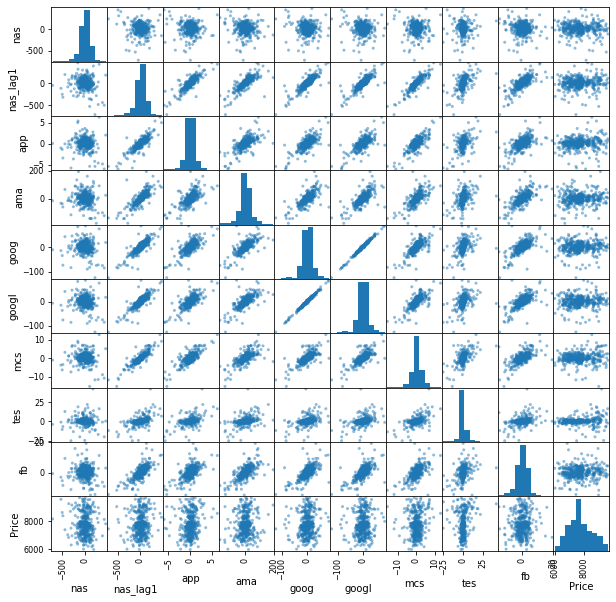

In [12]:
# pandas.tools.plotting is changed to pandas.plotting
from pandas.plotting import scatter_matrix
s_m = scatter_matrix(Train, figsize=(10, 10))

In [13]:
panel.corr()

,nas,nas_lag1,app,ama,goog,googl,mcs,tes,fb,Price
nas,1.000000,-0.111739,-0.023354,-0.126081,-0.136308,-0.126286,-0.101843,0.010078,-0.067483,-0.006149
nas_lag1,-0.111739,1.000000,0.827550,0.816187,0.849754,0.850574,0.890541,0.529969,0.748341,0.094253
app,-0.023354,0.827550,1.000000,0.676336,0.641646,0.646897,0.733604,0.522677,0.609590,0.109047
ama,-0.126081,0.816187,0.676336,1.000000,0.729972,0.726021,0.719126,0.451336,0.695968,0.084964
goog,-0.136308,0.849754,0.641646,0.729972,1.000000,0.993576,0.755602,0.368901,0.692134,0.051020
googl,-0.126286,0.850574,0.646897,0.726021,0.993576,1.000000,0.759203,0.367338,0.689264,0.050678
mcs,-0.101843,0.890541,0.733604,0.719126,0.755602,0.759203,1.000000,0.453844,0.636077,0.054793
tes,0.010078,0.529969,0.522677,0.451336,0.368901,0.367338,0.453844,1.000000,0.354733,0.126735
fb,-0.067483,0.748341,0.609590,0.695968,0.692134,0.689264,0.636077,0.354733,1.000000,0.057072
Price,-0.006149,0.094253,0.109047,0.084964,0.051020,0.050678,0.054793,0.126735,0.057072,1.000000


In [15]:
#adjusted R-squared is large
#coeff to compare which variable is the most important
#app is the most important, it has the largest absolute value
import statsmodels.formula.api as smf
formula = 'nas~nas_lag1+app+ama+goog+googl+mcs+tes+fb'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()
#app has higher coefficient, and it contributes the most to nas

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nas   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.239
Date:                Wed, 14 Oct 2020   Prob (F-statistic):              0.275
Time:                        16:26:05   Log-Likelihood:                -2501.8
No. Observations:                 400   AIC:                             5022.
Df Residuals:                     391   BIC:                             5058.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4785      6.392      0.857      0.392      -7.088      18.045
nas_lag1      -0.0724      0.168     -0.430      0.667      -0.403       0.258
app            2.8896      9.247      0.313      0.755     -15.290      21.069
ama           -0.4055      0.261     -1.551      0.122      -0.920       0.109
goog          -0.3861      2.596     -0.149      0.882      -5.490       4.717
googl          0.2313      2.561      0.090      0.928      -4.803       5.265
mcs            0.8483      5.191      0.163      0.870      -9.357      11.054
tes            2.5596      1.513      1.692      0.091      -0.414       5.533
fb             0.3854      2.434      0.158      0.874      -4.400       5.171
==============================================================================
Omnibus:                      104.760   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.131
Skew:                          -1.022   Prob(JB):                    4.17e-114
Kurtosis:                       8.211   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

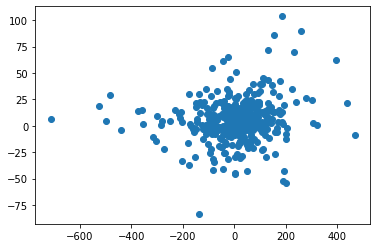

In [19]:
import matplotlib.pyplot as plt
plt.scatter(Train['nas'], Train['PredictedY'])
###eg x=10, y=10; x=20,y=20 =>good model slope equals to 1 => actual = predicted

In [20]:
#The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift 
#in the independent variable while holding other variables in the model constant. 
#This property of holding the other variables constant is crucial because it allows you to assess
#the effect of each variablein isolation from the others.
#### may have binding variables ####

In [21]:
#The Durbin-Watson statistic will always have a value between 0 and 4. 
#A value of 2.0 means that there is no autocorrelation detected in the sample. 
#Values from 0 to less than 2 indicate positive autocorrelation
#Values from from 2 to 4 indicate negative autocorrelation.
#https://www.investopedia.com/terms/d/durbin-watson-statistic.asp#:~:text=The%20Durbin%2DWatson%20statistic%20will,to%204%20indicate%20negative%20autocorrelation.

In [22]:
#difference between R2 and adjusted R2
#https://discuss.analyticsvidhya.com/t/difference-between-r-square-and-adjusted-r-square/264/3

#The correlation coefficient provides a measure of linear association between X and Y with no adjustment for other variables.
#If you estimate a simple linear regression model (with X as the only explanatory variable and Y as the outcome variable), 
#the raw and standardized regression coefficients will have the same sign as the correlation between X and Y, 
#and the standardized regression coefficient (which is what many people mean when they talk about a Beta coefficient in regression)
#will be equivalent to the correlation.
#But as soon as you include one or more additional explanatory variables in the model, 
#there is no reason to expect the signs to remain the same. 

In [23]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [24]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [25]:
# Get the assement table fo our model
assessTable(Test, Train, lm, 8, 'nas')

,Train,Test
R2,0.004760,-0.024106
RMSE,127.360678,203.750500


In [26]:
### add this to remove the above error
import warnings
warnings.filterwarnings("ignore")

In [31]:
#result shows that we cannot predict nasdaq100 index only based on the dominant stock